In [7]:
import pickle
import pandas as pd
import numpy as np
from statsbombpy import sb
import seaborn as sns
import matplotlib.pyplot as plt
from one_two.functions import get_team_info, plot_one_two_heatmaps, get_player_one_twos, key_one_two_percentage
pd.set_option("display.max_columns", None)

In [2]:
with open("data/WSL_20_21_all_one_twos.pickle", "rb") as f:
    one_twos = pickle.load(f)

In [3]:
# put it in a single df
one_twos_aggregated = pd.DataFrame([])
for key in one_twos.keys():
    one_twos_aggregated = pd.concat([one_twos_aggregated, one_twos[key]], axis=0)

In [4]:
# split into opening and closing passes
open_agg = one_twos_aggregated.iloc[::2, :]

close_agg = one_twos_aggregated.iloc[1::2, :]

In [5]:
open_counts = open_agg.player.value_counts()
open_counts = open_counts.reset_index()

# add team info
open_counts = get_team_info(open_counts, open_agg)

close_counts = close_agg.player.value_counts()
close_counts = close_counts.reset_index()

close_counts = get_team_info(close_counts, close_agg)


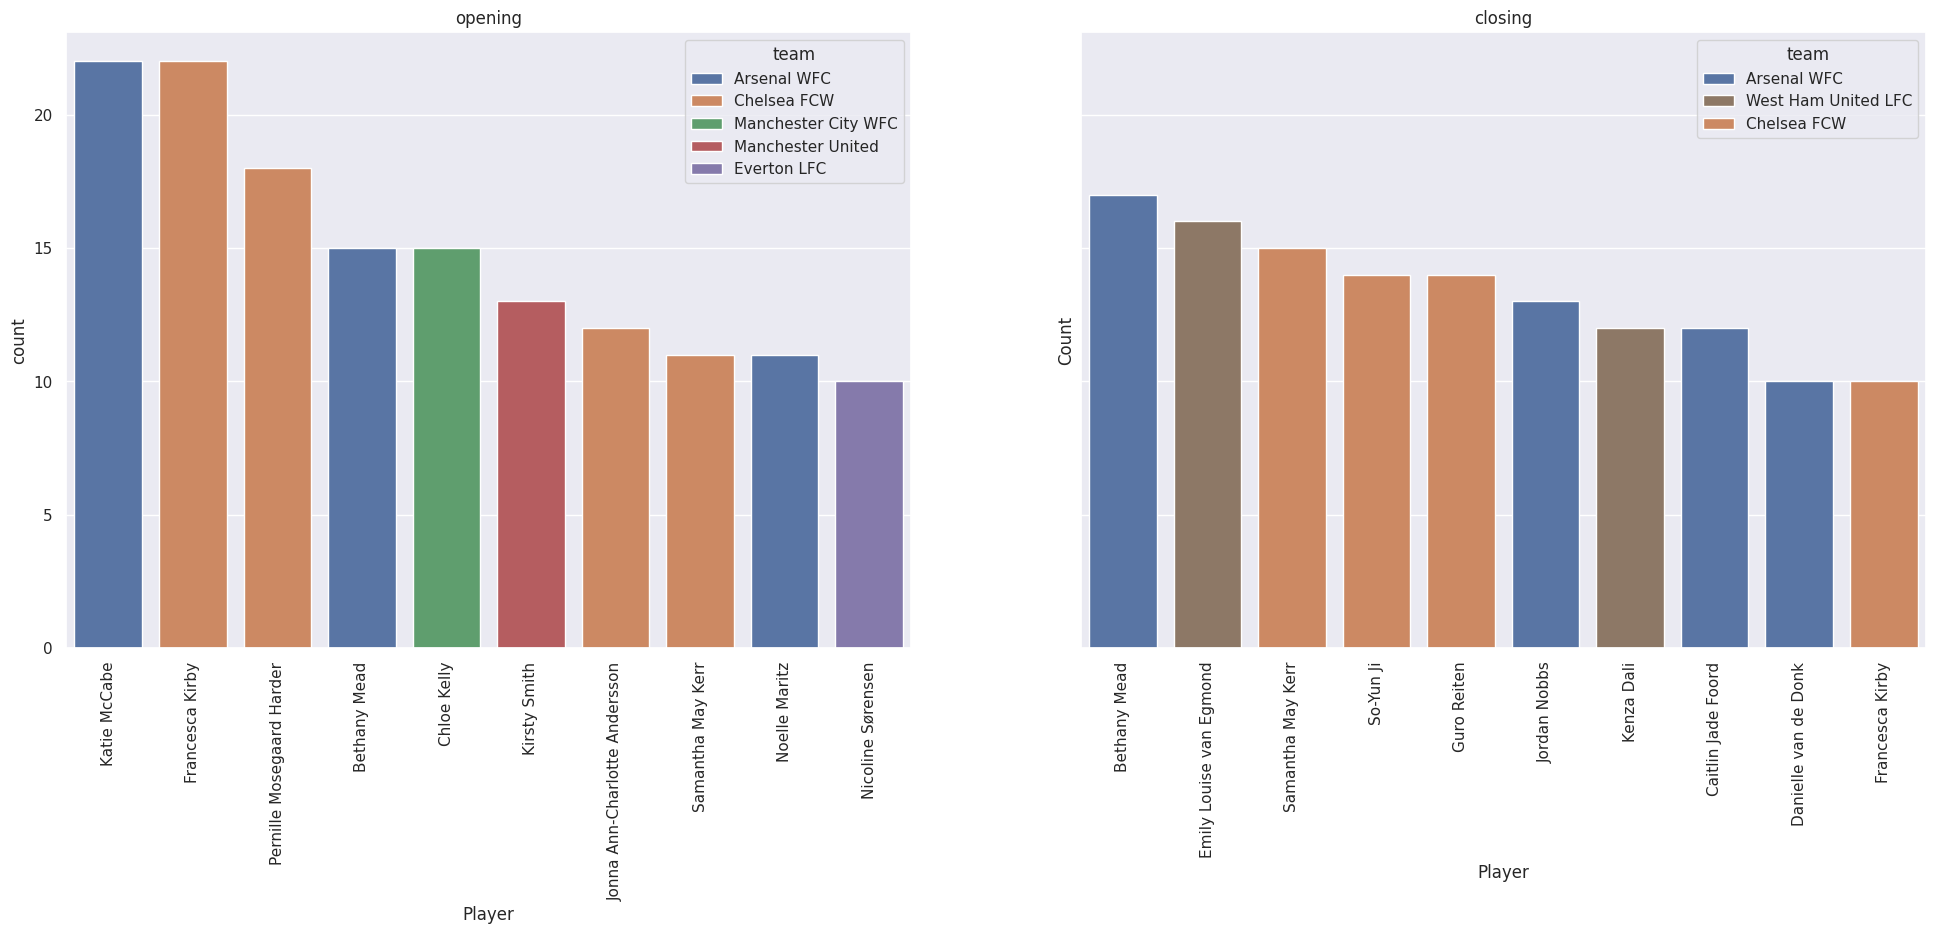

In [64]:
# plot open and close in subplots - TOP 10 only

open_10 = open_counts.iloc[:10, :]
close_10 = close_counts.iloc[:10, :]

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(24,8))
# plt.title("Players With Most One-Two Passes Per Team (WSL 20/21)")

# make color dict
unique = open_counts["team"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

sns.barplot(x="player", y="count", data=open_10, hue="team", palette=palette, ax=ax[0], dodge=False)
ax[0].set_title("opening")
sns.barplot(x="player", y="count", data=close_10, hue="team", palette=palette, ax=ax[1], dodge=False)
ax[1].set_title("closing")
plt.ylabel("Count")
ax[0].set_xlabel("Player")
ax[1].set_xlabel("Player")
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
plt.show()

In [65]:
# ONLY BETH MEAD APPEARS IN TOP 5 FOR BOTH

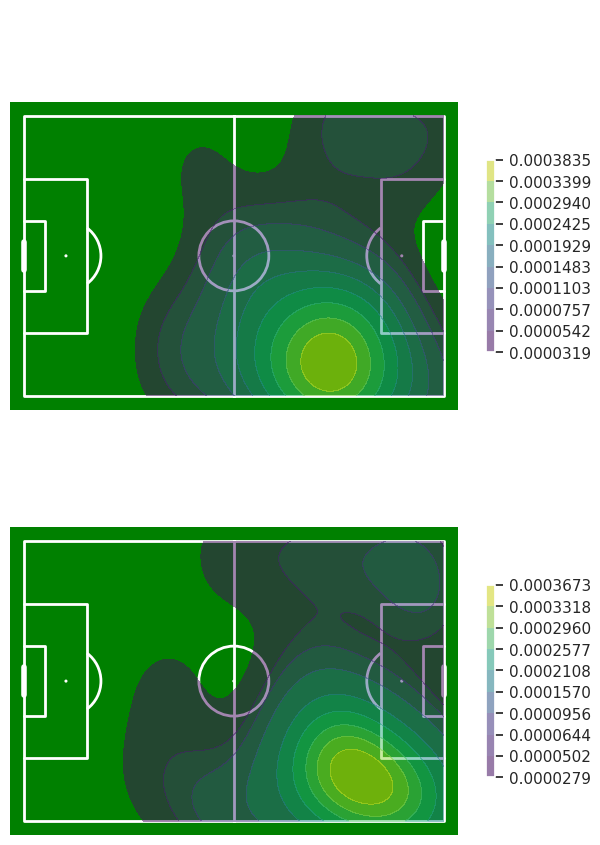

<Figure size 1200x800 with 0 Axes>

In [66]:
# plot heatmap for beth mead

# make df of 1-2's for BM
BM_data = get_player_one_twos("Bethany Mead", one_twos_aggregated)

plot_one_two_heatmaps(data=BM_data, competition="WSL", season="2021", team="BM")

In [67]:
top_10 = list(set([player for player in open_10.player] + [player for player in close_10.player]))

player_data = {}
pcs = []
for player in top_10:
    player_data[player] = get_player_one_twos(player, one_twos_aggregated)


In [68]:
one_two_counts = open_counts.merge(close_counts, on="player", how="outer").rename(columns={"count_x": "open_count", "count_y": "close_count", "team_x": "team"})
one_two_counts.drop(columns=["team_y"])

# take only players in top 10 open or close:
idx = [i for i in range(len(one_two_counts)) if one_two_counts["player"].iloc[i] in top_10]
one_two_10 = one_two_counts.iloc[idx,:]

In [69]:
# get key pass percentage for each top 10 player
pcs = []
for player in one_two_10.player:
    pc = key_one_two_percentage(player_data[player])
    pcs.append(pc)

one_two_10["key_pc"] = pcs

/tmp/ipykernel_72292/1833157995.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_two_10["key_pc"] = pcs


In [70]:
one_two_10

,player,open_count,team,close_count,team_y,key_pc
0,Katie McCabe,22.0,Arsenal WFC,8.0,Arsenal WFC,10.000000
1,Francesca Kirby,22.0,Chelsea FCW,10.0,Chelsea FCW,18.750000
2,Pernille Mosegaard Harder,18.0,Chelsea FCW,5.0,Chelsea FCW,8.695652
3,Bethany Mead,15.0,Arsenal WFC,17.0,Arsenal WFC,3.125000
4,Chloe Kelly,15.0,Manchester City WFC,9.0,Manchester City WFC,4.166667
5,Kirsty Smith,13.0,Manchester United,3.0,Manchester United,0.000000
6,Jonna Ann-Charlotte Andersson,12.0,Chelsea FCW,10.0,Chelsea FCW,0.000000
7,Samantha May Kerr,11.0,Chelsea FCW,15.0,Chelsea FCW,19.230769
8,Noelle Maritz,11.0,Arsenal WFC,3.0,Arsenal WFC,7.142857
9,Nicoline Sørensen,10.0,Everton LFC,8.0,Everton LFC,5.555556


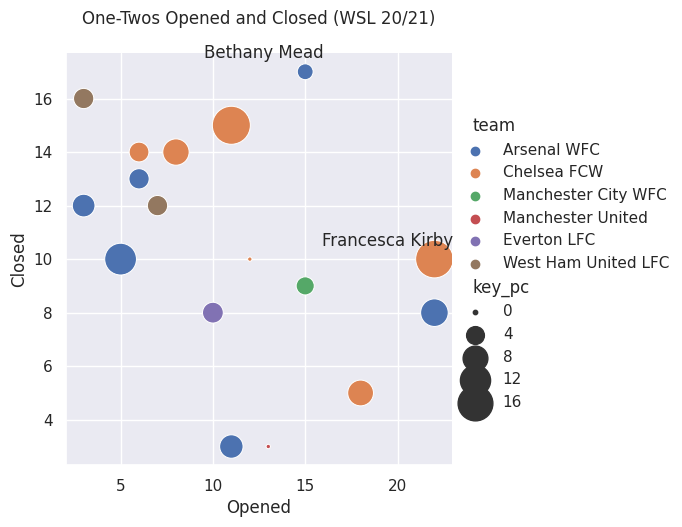

In [71]:
# plot opening against closing, scatter plot size = key pass percentage
sns.set(rc={"figure.figsize": (20,15)})

p = sns.relplot(x="open_count", y="close_count", data=one_two_10, hue="team", size="key_pc", sizes=(10,750))
ax = p.axes[0,0]
ax.set_title("One-Twos Opened and Closed (WSL 20/21)\n")
ax.set_xlabel("Opened")
ax.set_ylabel("Closed")

for idx, row in one_two_10.iterrows():
    x = row[1]
    y = row[3]
    name = row[0]
    if name=="Bethany Mead" or name=="Francesca Kirby":
        ax.text(x+1, y+0.5, name, horizontalalignment='right')
plt.savefig("WSL_open_v_closed_key.png")
plt.show()